In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns  

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


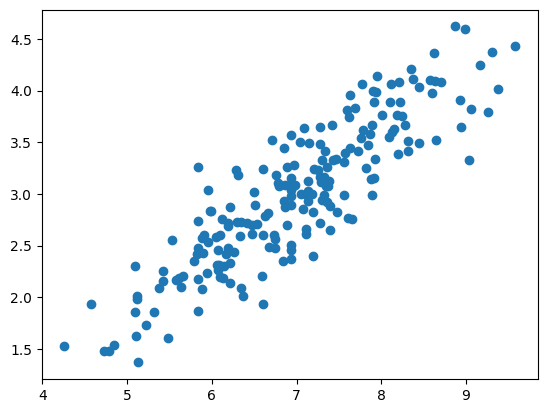

In [3]:
plt.scatter(df.cgpa, df.package)

In [4]:
X= df.iloc[:,0:1]
Y = df.iloc[:,1:2]
Y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [7]:
from sklearn.linear_model import LinearRegression   

In [8]:
lr= LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

c:\Users\Jeevan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.89111601]])

Text(0, 0.5, 'Package(in lpa)')

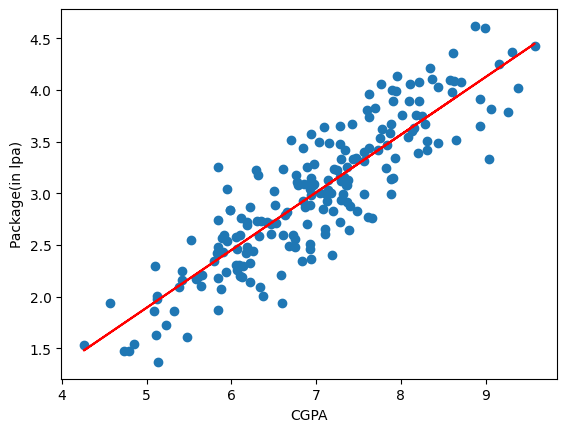

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
m= lr.coef_

In [13]:
b= lr.intercept_

In [14]:
m * 9.5 + b

array([[4.40443183]])

# Common Regression Metrics

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
y_pred= lr.predict(x_test)

In [23]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.2884710931878175

In [24]:
mean_squared_error(y_test, y_pred)

0.12129235313495527

In [26]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.34827051717731616

In [27]:
r2= r2_score(y_test, y_pred)
r2

0.780730147510384

In [29]:
x_test.shape

(40, 1)

In [30]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [31]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1.head()

,cgpa,package,random_feature
0,6.89,3.26,0.699989
1,5.12,1.98,0.894708
2,7.82,3.25,0.077334
3,7.42,3.67,0.523681
4,6.94,3.57,0.600437


Text(0, 0.5, 'Package(in lpa)')

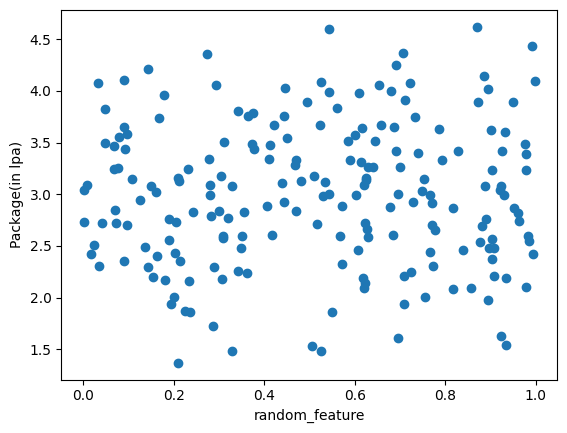

In [33]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [37]:
x1_train, x1_test, y1_train, y1_test = train_test_split(new_df1[['cgpa','random_feature']],new_df1['package'], test_size=0.2, random_state=2)

In [38]:
lr2= LinearRegression()

In [39]:
lr2.fit(x1_train,y1_train)

LinearRegression()

In [42]:
y1_pred= lr2.predict(x1_test)

In [43]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.780730147510384


In [45]:
r2adj= 1 - ((1-r2)*(40-1)/(40-1-2))

print("R2 adjusted",r2adj)

R2 adjusted 0.7688777230514858
